In [29]:
import math
from itertools import permutations
from matplotlib import pyplot as plt

<b>Rideshare Distance Definition<b>

In [30]:
def rideshare_distance(p, q):
    ''' Calculates rideshare distance between points p and q. That is, the
        distance when the car can only move along y direction or along x direction.
        No diagonal movement
        p: A list or tuple with two elements, both of which must be numeric.
        q: A list or tuple with two elements, both of which must be numeric.
    '''
    return abs(p[0] - q[0]) + abs(p[1] - q[1])


In [32]:
rideshare_distance((5,2), (7,5))

5

<b>Cost of a Rideshare<b>

In [34]:
def trip_cost(p, q, fare = 1.50):
    ''' Calculates total cost of ride depending on distance between two points
        calculated by rideshare_distance function.
        Args:
        p: A list or tuple with two elements, both of which must be numeric.
        q: A list or tuple with two elements, both of which must be numeric.
        fare: Number representing fare per mile, with default value 1.50.
    '''
    cost = rideshare_distance(p, q) * fare
    cost = "{:.2f}".format(cost)
    print("The cost of the trip will be ${}".format(cost))

In [35]:
trip_cost((5,2), (7,5))

The cost of the trip will be $7.50


<b> Calulate the Rideshare Distance with Numerous Stops<b>

In [7]:
def simple_route(start, stops, end):
    ''' Calculates total rideshare distance travelled in a trip with multiple stops.
    Args:
    start: Represents starting point of trip
    stops: Represents all the stops made on a trip in between the start and end.
    end: Represents ending point of trip.
    Returns:
    '''
    total_distance = 0
    p = start
    for stop in stops:
        q = stop
        total_distance += rideshare_distance(p, q)
        p = stop
    total_distance += rideshare_distance(p, end)
    return total_distance

def best_route(start, stops, end):
    ''' Calculates shortest possible rideshare distance between multiple stops and determines optimal order that
    the stops must be reached in to achieve the shortest distance.
    Args:
    start:Represents starting point of trip.
    stops: Represents all the stops made on a trip in between the start and end.
    end: Represents ending point of trip.
    '''
    perms = list(permutations(range(len(stops))))
    best_distance = simple_route(start, stops, end)
    best_perm = perms[0]
    for new_perm in perms:
        new_stops = [stops[i] for i in new_perm]
        new_distance = simple_route(start, new_stops, end)
        if new_distance < best_distance:
            best_distance = new_distance
            best_perm = new_perm
    return best_distance, best_perm


In [36]:
start = (-2,3)
stops = [(-1,-2),(3,3),(2,-1)]
end=(4,0)
simple_distance = simple_route(start,stops,end)
best_distance, best_perm= best_route(start,stops,end)
print("The simple distance for the points is", simple_distance,
      "while the best distance is",best_distance)
print("The best distance is achieved with permutation",best_perm)

The simple distance for the points is 23 while the best distance is 19
The best distance is achieved with permutation (0, 2, 1)


<b> Show Best Route Graphically<b>

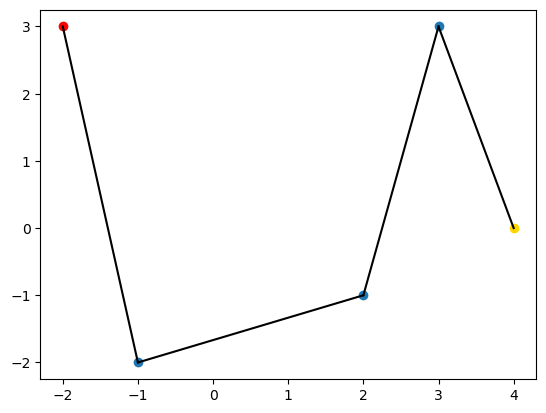

In [26]:
plt.scatter(x_stops,y_stops)
plt.scatter(start_point[0],start_point[1],color="red")
plt.scatter(stop_point[0],stop_point[1],color="gold")
def plot_line(p,q):
    plt.plot([p[0],q[0]],[p[1],q[1]],color="black")
plot_line(start,stops[best_perm[0]])
plot_line(stops[best_perm[0]],stops[best_perm[1]])
plot_line(stops[best_perm[1]],stops[best_perm[2]])
plot_line(stops[best_perm[2]],end)